In [195]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tiktoken
from openai import OpenAI
from dotenv import load_dotenv
from time import sleep
from IPython.display import display, HTML
import random


load_dotenv()

client = OpenAI()

In [66]:
epistimalogical_features = {
    "behavior": {
        "Social": {
            "Description": "Refers to beliefs, perceptions, preferences, and socially constructed rules that govern human experience; can be 'real' or opinion, but is intrinsically of human origins.",
            "Examples": [
                "I exist and am the same person I was yesterday.",
                "He yelled at me because he was angry.",
                "There are seven days in the week.",
            ],
        },
        "Physical": {
            "Description": "Refers to objective features of the world as described by physics, biology, engineering, mathematics, or other natural rules; can be measured empirically or derived logically.",
            "Examples": [
                "Men on average are taller than women.",
                "The Earth is the third planet from the Sun.",
                "Ants are smaller than elephants.",
            ],
        },
    },
    "everyday": {
        "Everyday": {
            "Description": "People encounter, or could encounter, situations like this in the course of their ordinary, everyday experiences.",
            "Examples": [
                "Touching a hot stove will burn you.",
                "Commuting at rush hour takes longer.",
                "It is rude to jump the line.",
            ],
        },
        "Abstract": {
            "Description": "Refers to regularities or conclusions that cannot be observed or arrived at solely through individual experience.",
            "Examples": [
                "Capitalism is a better economic system than Communism.",
                "Strict gun laws save lives.",
                "God exists.",
            ],
        },
    },
    "figure of speech": {
        "Figure of Speech": {
            "Description": "Contains an aphorism, metaphor, hyperbole.",
            "Examples": [
                "Birds of a feather flock together.",
                "A friend to all is a friend to none.",
            ],
        },
        "Literal Language": {
            "Description": "Plain and ordinary language that means exactly what it says.",
            "Examples": [
                "The sky is blue.",
                "Elephants are larger than dogs.",
                "Abraham Lincoln was a great president.",
            ],
        },
    },
    "judgment": {
        "Normative": {
            "Description": "Refers to a judgment, belief, value, social norm or convention.",
            "Examples": [
                "If you are going to the office, you should wear business attire, not a bathing suit.",
                "Treat others how you want them to treat you.",
                "Freedom is a fundamental human right.",
            ],
        },
        "Positive": {
            "Description": "Refers to something in the world such as an empirical regularity or scientific law.",
            "Examples": [
                "Hot things will burn you.",
                "The sun rises in the east and sets in the west.",
            ],
        },
    },
    "opinion": {
        "Opinion": {
            "Description": "Something that someone might think is true, or wants others to think is true, but can’t be demonstrated to be objectively correct or incorrect; it is inherently subjective.",
            "Examples": [
                "FDR was the greatest US president of the 20th Century.",
                "The Brooklyn Bridge is prettier than the Golden Gate.",
                "Vaccine mandates are a tolerable imposition on individual freedom.",
            ],
        },
        "Factual": {
            "Description": "Something that can be demonstrated to be correct or incorrect, independently of anyone’s opinion.",
            "Examples": [
                "The earth is the third planet from the sun.",
                "Obama was the 24th president of the United States.",
                "It will be sunny next Tuesday.",
            ],
        },
    },
    "reasoning": {
        "Knowledge": {
            "Description": "The claim refers to some observation about the world; it may be true or false, opinion or fact, subjective or objective.",
            "Examples": [
                "The sun rises in the east and sets in the west.",
                "Dogs are nicer than cats.",
                "Glasses break when they are dropped.",
            ],
        },
        "Reasoning": {
            "Description": "The claim presents a conclusion that is arrived at by combining knowledge and logic.",
            "Examples": [
                "The sun is in the east, therefore it is morning.",
                "My dog is wagging its tail, therefore it is happy.",
                "The glass fell off the table, therefore it will break and the floor will become wet.",
            ],
        },
    },
}

In [67]:
json.dumps(epistimalogical_features)

'{"behavior": {"Social": {"Description": "Refers to beliefs, perceptions, preferences, and socially constructed rules that govern human experience; can be \'real\' or opinion, but is intrinsically of human origins.", "Examples": ["I exist and am the same person I was yesterday.", "He yelled at me because he was angry.", "There are seven days in the week."]}, "Physical": {"Description": "Refers to objective features of the world as described by physics, biology, engineering, mathematics, or other natural rules; can be measured empirically or derived logically.", "Examples": ["Men on average are taller than women.", "The Earth is the third planet from the Sun.", "Ants are smaller than elephants."]}}, "everyday": {"Everyday": {"Description": "People encounter, or could encounter, situations like this in the course of their ordinary, everyday experiences.", "Examples": ["Touching a hot stove will burn you.", "Commuting at rush hour takes longer.", "It is rude to jump the line."]}, "Abstrac

In [68]:
design_point = {
    "behavior": "Social",
    "everyday": "Everyday",
    "figure of speech": "Figure of Speech",
    "judgment": "Normative",
    "opinion": "Opinion",
    "reasoning": "Knowledge",
}

In [69]:
wikipedia_categories = [
    "General reference",
    "Culture and the arts",
    "Geography and places",
    "Health and fitness",
    "History and events",
    "Human activities",
    "Mathematics and logic",
    "Natural and physical sciences",
    "People and self",
    "Philosophy and thinking",
    "Religion and belief systems",
    "Society and social sciences",
    "Technology and applied sciences",
]

In [70]:
prompt = f'Give me the all statements that best belong to the following general category "{wikipedia_categories[0]}" with epistimalogical features \n'

for key in epistimalogical_features.keys():
    sub_key = design_point[key]
    prompt += f"\n'{key}' is '{sub_key}' meaning {epistimalogical_features[key][sub_key]['Description']}"

print(prompt)

Give me the all statements that best belong to the following general category "General reference" with epistimalogical features 

'behavior' is 'Social' meaning Refers to beliefs, perceptions, preferences, and socially constructed rules that govern human experience; can be 'real' or opinion, but is intrinsically of human origins.
'everyday' is 'Everyday' meaning People encounter, or could encounter, situations like this in the course of their ordinary, everyday experiences.
'figure of speech' is 'Figure of Speech' meaning Contains an aphorism, metaphor, hyperbole.
'judgment' is 'Normative' meaning Refers to a judgment, belief, value, social norm or convention.
'opinion' is 'Opinion' meaning Something that someone might think is true, or wants others to think is true, but can’t be demonstrated to be objectively correct or incorrect; it is inherently subjective.
'reasoning' is 'Knowledge' meaning The claim refers to some observation about the world; it may be true or false, opinion or fa

In [71]:
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": "Write 100 short common sense claims in Farsi that are open to different interpretations and has all the properties mentioned below. Do not explain the result, just provide a single short claim in a JSON list under the key 'statements'.",
        },
        {"role": "user", "content": prompt},
    ],
    response_format={"type": "json_object"},
    presence_penalty=-1,
)

print(completion.choices[0].message)

ChatCompletionMessage(content='{\n  "statements": [\n    "درخت دوستی بنشان که کام دل به بار آرد.",\n    "همیشه حق با مشتری نیست.",\n    "یک دست صدا ندارد.",\n    "در کار خیر حاجت هیچ استخاره نیست.",\n    "هر که بامش بیش، برفش بیشتر.",\n    "هر که طاووس خواهد جور هندوستان کشد.",\n    "هر چیزی به وقتش خوش است.",\n    "نابرده رنج، گنج میسر نمی\u200cشود.",\n    "آب در کوزه و ما تشنه لبان می\u200cگردیم.",\n    "تا تنور گرم است باید نان را چسباند.",\n    "نیمه پر لیوان را ببین.",\n    "علف باید به دهن بزی شیرین بیاید.",\n    "هرکه خربزه می\u200cخورد پای لرزش هم می\u200cنشیند.",\n    "به مرگ بگیر که به تب راضی\u200cشود.",\n    "گنج در ویرانه است.",\n    "خود کرده را تدبیر نیست.",\n    "آب که از سر گذشت، چه یک نی چه صدهزار نی.",\n    "از دل برود هر آنچه از دیده برفت.",\n    "خود را به کوچه علی چپ زدن.",\n    "گاو نر پایش همیشه در بقالی است.",\n    "کار نیک از پر کردن صمیم می\u200cشود.",\n    "دل به دل راه دارد.",\n    "هرجا کار می\u200cکنند ما هم هستیم.",\n    "هرجا کار می\u200cکنند من همان\u2

In [200]:
json.loads(completion.choices[0].message.content)

{'statements': ['Actions speak louder than words.',
  'Beauty is in the eye of the beholder.',
  'Birds of a feather flock together.',
  "Money can't buy happiness.",
  'Laughter is the best medicine.',
  'Time heals all wounds.',
  'The early bird catches the worm.',
  'Two heads are better than one.',
  'When in Rome, do as the Romans do.',
  'Every cloud has a silver lining.',
  'Actions have consequences.',
  'The pen is mightier than the sword.',
  'Absence makes the heart grow fonder.',
  'Practice makes perfect.',
  "You can't judge a book by its cover.",
  'A picture is worth a thousand words.',
  'Honesty is the best policy.',
  'The grass is always greener on the other side.',
  'Better late than never.',
  'Love makes the world go round.',
  'You reap what you sow.',
  'The squeaky wheel gets the grease.',
  'You can’t have your cake and eat it too.',
  'Good things come to those who wait.',
  'Beauty is only skin deep.',
  'What doesn’t kill you makes you stronger.',
  'You

## Create batch statement generation job

In [201]:
def get_dict(id, prompt):
    return {
        "custom_id": f"request-{id}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4o",
            "messages": [
                {
                    "role": "system",
                    # "content": "Write 100 short common sense claim that has all of the following properties. Do not explain the result, just provide a single short claim in a JSON list.",
                    "content": "Write 100 short common sense claims that are open to different interpretations and has all the properties mentioned below. Do not explain the result, just provide a single short claim in a JSON list under the key 'statements'.",
                },
                {"role": "user", "content": prompt},
            ],
            "response_format": {"type": "json_object"},
            "max_tokens": 4094,
            "temperature": round(random.uniform(1, 1.5), 2),
            "presence_penalty": -1,
        },
    }


with open("statement-batch.jsonl", "w") as file:
    for i in range(0, 20):
        data = get_dict(i, prompt)
        file.write(json.dumps(data) + "\n")

### Upload the data to openai batch api

In [202]:

batch_input_file = client.files.create(
  file=open("statement-batch.jsonl", "rb"),
  purpose="batch"
)

Create the batch job with the uploaded data

In [203]:
# Create a batch
statement_batch_job = client.batches.create(
    input_file_id=batch_input_file.id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={"description": "statement generation batch"},
)

In [204]:
statement_batch_job

Batch(id='batch_lqMkF3rdzPka4tR5nv9bqBti', completion_window='24h', created_at=1724410986, endpoint='/v1/chat/completions', input_file_id='file-FbDI24sQLxbBhpZV6514JFDD', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1724497386, failed_at=None, finalizing_at=None, in_progress_at=None, metadata={'description': 'statement generation batch'}, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))

In [205]:
while (
    statement_batch_job.status == "in_progress"
    or statement_batch_job.status == "validating"
):
    statement_batch_job = client.batches.retrieve(statement_batch_job.id)
    print(statement_batch_job.status)
    if statement_batch_job.status == "failed":
        print(statement_batch_job.error)
        break
    elif statement_batch_job.status == "completed":
        print(statement_batch_job.output_file_id)
        break
    sleep(20)

in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
completed
file-Pv0JPxiXF0aIsuifvq6I6TNP


In [206]:
if statement_batch_job.status == "completed":
    print("Batch job completed")
    output_file = client.files.content(statement_batch_job.output_file_id)
else:
    print("Batch job status:", statement_batch_job.status)

Batch job completed


In [207]:
with open("statement-batch-output.jsonl", "w") as file:
    file.write(output_file.text)

In [208]:
statement_list = []

with open("statement-batch-output.jsonl", "r") as file:
    for idx, line in enumerate(file):
        try:
            data = json.loads(line)
            print(idx, data["response"]["body"]["usage"])
            statement: str = data["response"]["body"]["choices"][0]["message"]["content"]
            # print(json.loads(statement)["statements"])
            statement_list.extend(json.loads(statement)["statements"])
        except Exception as e:
            print(e)


df = pd.DataFrame(statement_list, columns=["statement"])
df.drop_duplicates(inplace=True)
df.to_csv("statement-batch-output-2.csv", index=False)

0 {'prompt_tokens': 277, 'completion_tokens': 903, 'total_tokens': 1180}
1 {'prompt_tokens': 277, 'completion_tokens': 953, 'total_tokens': 1230}
2 {'prompt_tokens': 277, 'completion_tokens': 887, 'total_tokens': 1164}
3 {'prompt_tokens': 277, 'completion_tokens': 1655, 'total_tokens': 1932}
4 {'prompt_tokens': 277, 'completion_tokens': 910, 'total_tokens': 1187}
5 {'prompt_tokens': 277, 'completion_tokens': 850, 'total_tokens': 1127}
6 {'prompt_tokens': 277, 'completion_tokens': 914, 'total_tokens': 1191}
7 {'prompt_tokens': 277, 'completion_tokens': 925, 'total_tokens': 1202}
8 {'prompt_tokens': 277, 'completion_tokens': 912, 'total_tokens': 1189}
9 {'prompt_tokens': 277, 'completion_tokens': 776, 'total_tokens': 1053}
10 {'prompt_tokens': 277, 'completion_tokens': 978, 'total_tokens': 1255}
11 {'prompt_tokens': 277, 'completion_tokens': 822, 'total_tokens': 1099}
12 {'prompt_tokens': 277, 'completion_tokens': 908, 'total_tokens': 1185}
13 {'prompt_tokens': 277, 'completion_tokens': 

In [207]:
encoding = tiktoken.get_encoding("o200k_base")

tools = [
    {
        "type": "function",
        "function": {
            "name": "get_statement_rating",
            "description": "Rate the statement common sense level",
            "parameters": {
                "type": "object",
                "properties": {
                    "i_agree": {
                        "type": "string",
                        "description": "Do you agree with this statement?",
                        "enum": ["yes", "no"],
                    },
                    "others_agree": {
                        "type": "string",
                        "description": "Do you think most other people would agree with this statement?",
                        "enum": ["yes", "no"],
                    },
                    "explanation": {
                        "type": "string",
                        "description": "An explanation of how the answer was created",
                    },
                },
                "required": [
                    "i_agree",
                    "others_agree",
                    "explanation",
                ],
            },
        },
    }
]

tokens = {
    "yes": encoding.encode("yes"),
    "no": encoding.encode("no"),
    "Yes": encoding.encode("Yes"),
    "No": encoding.encode("No"),
}

statement = "What goes around, comes around."

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": "You are an average person living in the United States. Your are given a statement. Rate the statement common sense level.",
        },
        {
            "role": "user",
            "content": f"Do you agree with this `{statement}`? answer with only Yes or No.",
        },
    ],
    max_tokens=100,
    logprobs=True,
    top_logprobs=5,
    logit_bias={
        "6763": 100,
        "13022": 100,
        "1750": 100,
        "3160": 100,
    },
)

print(completion)

ChatCompletion(id='chatcmpl-A0wT5nteXiHe2R05Gpgy6OzELomPW', choices=[Choice(finish_reason='length', index=0, logprobs=ChoiceLogprobs(content=[ChatCompletionTokenLogprob(token='Yes', bytes=[89, 101, 115], logprob=-5.5122365e-07, top_logprobs=[TopLogprob(token='Yes', bytes=[89, 101, 115], logprob=-5.5122365e-07), TopLogprob(token='No', bytes=[78, 111], logprob=-14.875001), TopLogprob(token=' Yes', bytes=[32, 89, 101, 115], logprob=-15.750001), TopLogprob(token='YES', bytes=[89, 69, 83], logprob=-18.75), TopLogprob(token='\n', bytes=[10], logprob=-19.625)]), ChatCompletionTokenLogprob(token='No', bytes=[78, 111], logprob=-9999.0, top_logprobs=[TopLogprob(token='<|end|>', bytes=None, logprob=-0.5759504), TopLogprob(token='.', bytes=[46], logprob=-0.8259504), TopLogprob(token='.\n', bytes=[46, 10], logprob=-12.325951), TopLogprob(token='。', bytes=[227, 128, 130], logprob=-12.825951), TopLogprob(token='<|end|>', bytes=None, logprob=-12.825951)]), ChatCompletionTokenLogprob(token='Yes', bytes

In [208]:
completion.to_dict()

{'id': 'chatcmpl-A0wT5nteXiHe2R05Gpgy6OzELomPW',
 'choices': [{'finish_reason': 'length',
   'index': 0,
   'logprobs': {'content': [{'token': 'Yes',
      'bytes': [89, 101, 115],
      'logprob': -5.5122365e-07,
      'top_logprobs': [{'token': 'Yes',
        'bytes': [89, 101, 115],
        'logprob': -5.5122365e-07},
       {'token': 'No', 'bytes': [78, 111], 'logprob': -14.875001},
       {'token': ' Yes', 'bytes': [32, 89, 101, 115], 'logprob': -15.750001},
       {'token': 'YES', 'bytes': [89, 69, 83], 'logprob': -18.75},
       {'token': '\n', 'bytes': [10], 'logprob': -19.625}]},
     {'token': 'No',
      'bytes': [78, 111],
      'logprob': -9999.0,
      'top_logprobs': [{'token': '<|end|>',
        'bytes': None,
        'logprob': -0.5759504},
       {'token': '.', 'bytes': [46], 'logprob': -0.8259504},
       {'token': '.\n', 'bytes': [46, 10], 'logprob': -12.325951},
       {'token': '。', 'bytes': [227, 128, 130], 'logprob': -12.825951},
       {'token': '<|end|>', 'byt

In [122]:
import re
import math


def clean_logprobs(response, tokens):
    def compute_prob(token):
        words = [
            {
                "word": next(
                    (
                        token
                        for token in tokens
                        if re.search(
                            f"{re.escape(token)}", word_data["token"], re.IGNORECASE
                        )
                    ),
                    None,
                ),
                "prob": math.exp(word_data["logprob"]),
            }
            for choice in response["choices"]
            for logprobs in choice["logprobs"]["content"]
            for word_data in logprobs["top_logprobs"]
        ]

        words = [word for word in words if word["word"]]
        total_prob = sum(word["prob"] for word in words)

        normalized_words = [
            {**word, "prob": word["prob"] / total_prob} for word in words
        ]

        return sum(word["prob"] for word in normalized_words if word["word"] == token)

    return {token: compute_prob(token) for token in tokens}


clean_logprobs(completion.to_dict(), ["yes", "no"])

{'yes': 0.9999996072140057, 'no': 3.927859943100448e-07}

In [57]:
top_two_logprobs = completion.choices[0].logprobs.content[0].top_logprobs

html_content = ""
for i, logprob in enumerate(top_two_logprobs, start=1):
    html_content += (
        f"<span style='color: green'>Output token {i}:</span> {logprob.token}, "
        f"<span style='color: darkorange'>logprobs:</span> {logprob.logprob}, "
        f"<span style='color: magenta'>linear probability:</span> {np.round(np.exp(logprob.logprob)*100,2)}%<br>"
    )
display(HTML(html_content))

In [123]:
def get_rating_dict(id, statement):
    return (
        {
            "custom_id": f"request-{id}-1",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4o",
                "messages": [
                    {
                        "role": "system",
                        "content": "You are an average person living in the United States. Your are given a statement. Rate the statement common sense level.",
                    },
                    {
                        "role": "user",
                        "content": f"Do you agree with this statement: `{statement}`? answer with only Yes Or No.",
                    },
                ],
                "max_tokens": 1,
                "logprobs": True,
                "top_logprobs": 10,
                "logit_bias": {
                    "6763": 100,
                    "13022": 100,
                    "1750": 100,
                    "3160": 100,
                },
            },
        },
        {
            "custom_id": f"request-{id}-2",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4o",
                "messages": [
                    {
                        "role": "system",
                        "content": "You are an average person living in the United States. Your are given a statement. Rate the statement common sense level.",
                    },
                    {
                        "role": "user",
                        "content": f"Do you think most people would agree with this statement: `{statement}`? answer with only Yes Or No.",
                    },
                ],
                "max_tokens": 1,
                "logprobs": True,
                "top_logprobs": 10,
                "logit_bias": {
                    "6763": 100,
                    "13022": 100,
                    "1750": 100,
                    "3160": 100,
                },
            },
        },
    )


statements = pd.read_csv("statement-batch-output.csv")


with open("statement-rating-batch.jsonl", "w") as file:
    for s in statements.iterrows():
        data = get_rating_dict(id=s[0], statement=s[1]["statement"])
        file.write(json.dumps(data[0]) + "\n")
        file.write(json.dumps(data[1]) + "\n")

In [124]:
# Upload the batch input file
batch_rating_input_file = client.files.create(
    file=open("statement-rating-batch.jsonl", "rb"), purpose="batch"
)


# Create a batch
statement_rating_batch_job = client.batches.create(
    input_file_id=batch_rating_input_file.id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={"description": "statement rating batch"},
)

In [125]:
while (
    statement_rating_batch_job.status == "in_progress"
    or statement_rating_batch_job.status == "validating"
):
    statement_rating_batch_job = client.batches.retrieve(statement_rating_batch_job.id)
    print(statement_rating_batch_job.status)
    if statement_rating_batch_job.status == "failed":
        print(statement_rating_batch_job.error)
        break
    elif statement_rating_batch_job.status == "completed":
        print(statement_rating_batch_job.output_file_id)
        break
    sleep(20)

completed
file-G8DFrD6MPzKkiHs77YSGguQr


In [126]:
if statement_rating_batch_job.status == "completed":
    print("Batch job completed")
    output_rating_file = client.files.content(statement_rating_batch_job.output_file_id)
else:
    print("Batch job status:", statement_rating_batch_job.status)

with open("statement-rating-batch-output.jsonl", "w") as file:
    file.write(output_rating_file.text)

Batch job completed


In [10]:
ratings_df = pd.read_csv('features/ratings.csv')

In [13]:
ratings_df.groupby(
    ["behavior", "everyday", "figure_of_speech", "judgment", "opinion", "reasoning"]
).count()

statement  hash
behavior everyday figure_of_speech judgment opinion reasoning                 
False    False    False            False    False   False             15    15
                                            True    False              5     5
                                   True     False   False             18    18
                                                    True               2     2
                                            True    False            111   111
                                                    True              24    24
                  True             True     True    False              5     5
                                                    True               9     9
         True     False            False    False   False            237   237
                                            True    False              5     5
                                   True     False   False            190   190
                                                    True              14    14
                                            True    False            142   142
                                                    True              19    19
                  True             True     True    True               1     1
True     False    False            True     True    False            415   415
                                                    True             192   192
                  True             True     True    False             21    21
                                                    True              21    21
         True     False            True     False   False             54    54
                                                    True               2     2
                                            True    False            484   484
                                                    True              89    89
                  True             True     True    False              1     1

In [128]:
statement_list = []

with open("statement-rating-batch-output.jsonl", "r") as file:
    for idx, line in enumerate(file):
        if idx % 2 == 0:
            new_statement = {}

            data = json.loads(line)
            statement_id = data["custom_id"].split("-")[1]

            answer = data["response"]["body"]
            answer_dist = clean_logprobs(answer, ["yes", "no"])

            new_statement["statement_id"] = int(statement_id)
            new_statement["i_agree"] = (
                answer_dist["yes"] > answer_dist["no"] and "yes" or "no"
            )
            new_statement["i_agree_probability"] = max(
                answer_dist["yes"], answer_dist["no"]
            )

        else:
            data = json.loads(line)
            statement_id = data["custom_id"].split("-")[1]

            answer = data["response"]["body"]
            answer_dist = clean_logprobs(answer, ["yes", "no"])

            new_statement["others_agree"] = (
                answer_dist["yes"] > answer_dist["no"] and "yes" or "no"
            )
            new_statement["others_agree_probability"] = max(
                answer_dist["yes"], answer_dist["no"]
            )

            statement_list.append(new_statement)


rated_statements_df = pd.DataFrame(statement_list)

In [156]:
original_statements_df = pd.read_csv("statement-batch-output.csv")

In [157]:
logprobs_df = rated_statements_df.join(original_statements_df)

In [158]:
# awareness: (r) => 1 - op.abs(r.others_agree - r.I_agree),
logprobs_df['awareness'] = 1 - abs(logprobs_df['others_agree_probability'] - logprobs_df['i_agree_probability'])

# consensus: (r) => (0.25 - r.I_agree * (1 - r.I_agree)) * 4
logprobs_df['consensus'] = (0.25 - logprobs_df['i_agree_probability'] * (1 - logprobs_df['i_agree_probability'])) * 4

# Commonsensicality: (r) => op.sqrt(r.awareness * r.consensus)
logprobs_df['commonsensicality'] = np.sqrt(logprobs_df['awareness'] * logprobs_df['consensus'])

logprobs_df

,statement_id,i_agree,i_agree_probability,others_agree,others_agree_probability,statement,awareness,consensus,commonsensicality
0,0,yes,1.000000,yes,1.000000,Actions speak louder than words.,1.000000,1.000000,1.000000
1,1,yes,1.000000,yes,1.000000,A picture is worth a thousand words.,1.000000,0.999998,0.999999
2,2,yes,0.999089,yes,0.999992,Good things come to those who wait.,0.999097,0.996359,0.997727
3,3,yes,0.999999,yes,1.000000,Honesty is the best policy.,0.999999,0.999995,0.999997
4,4,yes,1.000000,yes,1.000000,A chain is only as strong as its weakest link.,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2071,2071,yes,1.000000,yes,1.000000,Storms bring rain.,1.000000,1.000000,1.000000
2072,2072,no,0.867036,yes,0.777300,Age is just a number.,0.910264,0.538861,0.700361
2073,2073,yes,1.000000,yes,1.000000,Cooking at home can be healthier than dining out.,1.000000,1.000000,1.000000
2074,2074,yes,1.000000,yes,1.000000,Friendship can enrich your life.,1.000000,1.000000,1.000000


In [189]:
final_df = ratings_df.join(logprobs_df, rsuffix="_r")

In [190]:
final_df.groupby(
    ["behavior", "everyday", "figure_of_speech", "judgment", "opinion", "reasoning"]
).mean('commonsensicality')

statement_id  \
behavior everyday figure_of_speech judgment opinion reasoning                 
False    False    False            False    False   False        865.533333   
                                            True    False        726.400000   
                                   True     False   False        731.222222   
                                                    True         553.500000   
                                            True    False        684.450450   
                                                    True         694.458333   
                  True             True     True    False        715.600000   
                                                    True         800.000000   
         True     False            False    False   False       1449.962025   
                                            True    False       1215.200000   
                                   True     False   False       1456.510526   
                                                    True         669.642857   
                                            True    False       1198.288732   
                                                    True         672.263158   
                  True             True     True    True         153.000000   
True     False    False            True     True    False        801.551807   
                                                    True         674.244792   
                  True             True     True    False        580.142857   
                                                    True         672.904762   
         True     False            True     False   False       1552.685185   
                                                    True        1718.500000   
                                            True    False       1096.760331   
                                                    True        1050.382022   
                  True             True     True    False        624.000000   

                                                               i_agree_probability  \
behavior everyday figure_of_speech judgment opinion reasoning                        
False    False    False            False    False   False                 0.985028   
                                            True    False                 0.999149   
                                   True     False   False                 0.989337   
                                                    True                  0.999980   
                                            True    False                 0.987397   
                                                    True                  0.982595   
                  True             True     True    False                 0.924490   
                                                    True                  0.957411   
         True     False            False    False   False                 0.994619   
                                            True    False                 0.999977   
                                   True     False   False                 0.985681   
                                                    True                  0.999985   
                                            True    False                 0.960530   
                                                    True                  0.985018   
                  True             True     True    True                  1.000000   
True     False    False            True     True    False                 0.971196   
                                                    True                  0.983245   
                  True             True     True    False                 0.987044   
                                                    True                  0.959968   
         True     False            True     False   False                 0.988733   
                                                    True                  0.999990   
                              

<Axes: >

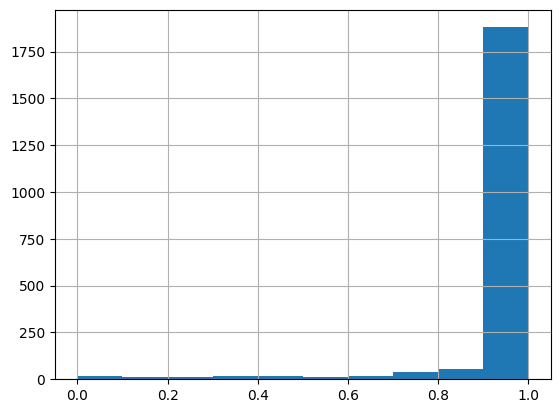

In [191]:
final_df.commonsensicality.hist()

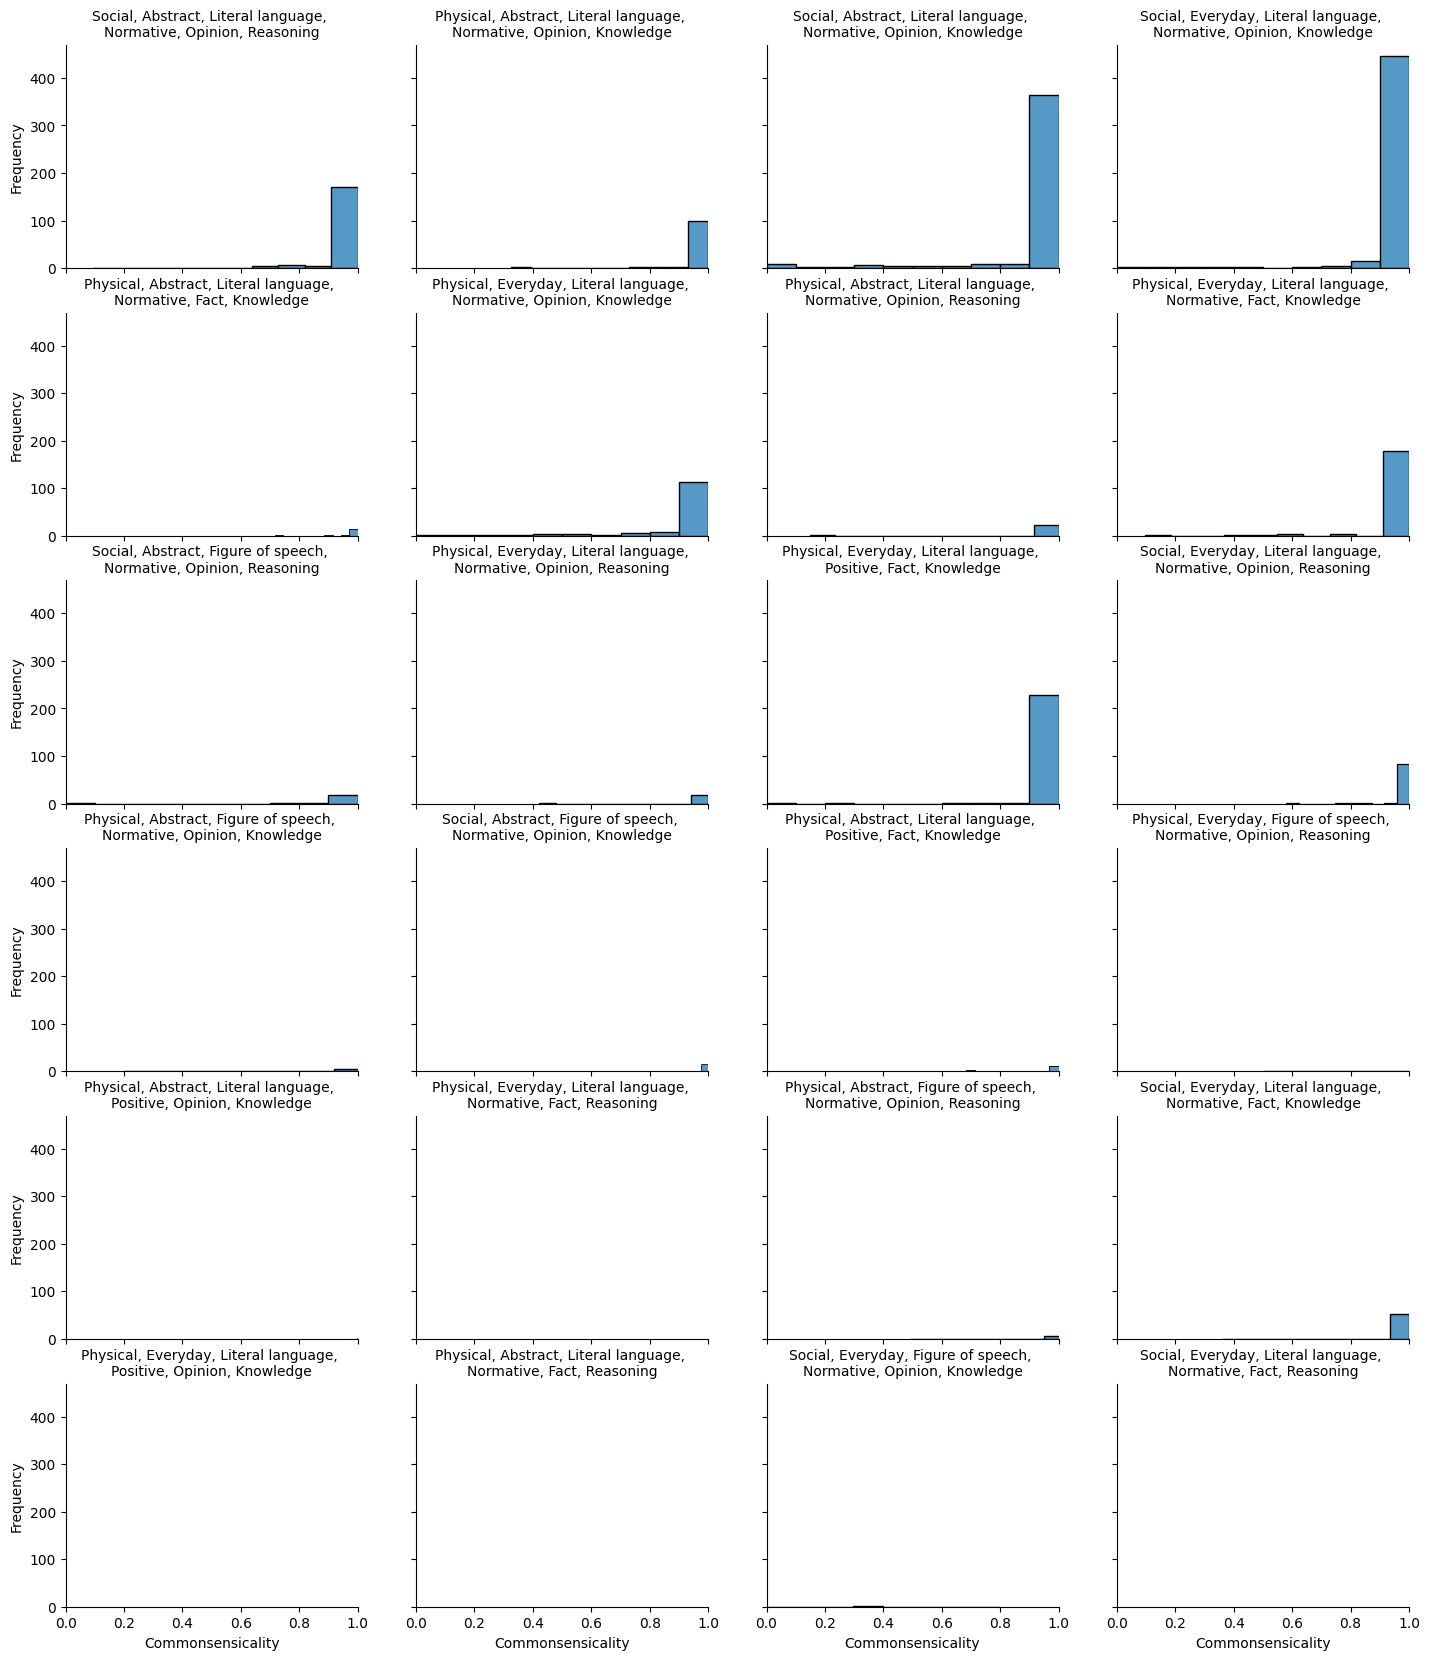

In [206]:
replace_dict = {
    "behavior": {False: "Physical", True: "Social"},
    "everyday": {False: "Abstract", True: "Everyday"},
    "figure_of_speech": {False: "Literal language", True: "Figure of speech"},
    "judgment": {False: "Positive", True: "Normative"},
    "opinion": {False: "Fact", True: "Opinion"},
    "reasoning": {False: "Knowledge", True: "Reasoning"},
}

plot_df = final_df.copy()


for column in replace_dict.keys():
    plot_df[column] = plot_df[column].map(replace_dict[column])


plot_df["config"] = (
    plot_df["behavior"]
    + ", "
    + plot_df["everyday"]
    + ", "
    + plot_df["figure_of_speech"]
    + ", \n"
    + plot_df["judgment"]
    + ", "
    + plot_df["opinion"]
    + ", "
    + plot_df["reasoning"]
)


unique_configs = plot_df["config"].unique()


plot_df = plot_df[plot_df["config"].isin(unique_configs)]


num_columns = 4
num_rows = len(unique_configs) // num_columns + 1


g = sns.FacetGrid(
    plot_df, col="config", col_wrap=num_columns, height=3, aspect=1.2
).set(xlim=(0, 1))
g.map(sns.histplot, "commonsensicality", bins=10, kde=False)

g.set_titles(col_template="{col_name}", fontsize=2)
g.set_axis_labels("Commonsensicality", "Frequency")
plt.subplots_adjust(top=0.9, hspace=0.2, wspace=0.2)
plt.show()